# NumPy

## Exercises

About the exercises:
- The exercises have a different level of difficulty.
- Pick the ones you find most interesting and add your approaches to this notebook.
- You are not supposed to solve all of them now.
- If something is unclear or you need/want help, do not hesitate to ask - today is the time to do so.

### `%timeit max() vs. np.max`

Use `%timeit` to compare the performance of Python's `max` to NumPy's `np.max`. Explain your observations.

In [1]:
import numpy as np

data_as_list = list(range(1_000_000))
data_as_array = np.array(data_as_list)

In [2]:
%timeit max(data_as_list)

17.7 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%timeit np.max(data_as_array)

1.08 ms ± 68.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit max([1, 2, 3, 4])

258 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
# if we run the test like this, we may incorrectly conclude that numpy is much slower
# problems:
# - too little data, i.e. hooking into numpy takes time
# - conversion of Python list into numpy array
# hence, if you want to compare max vs np.max, you need to create a sensible test case
# and make sure you measure *only* function execution time
%timeit np.max([1, 2, 3, 4])

16.1 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%timeit 1 + 1

8.7 ns ± 0.704 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


### Element-wise Maximum

Compute an array `z` that contains the element-wise maximum of two arrays `x` and `y`.

*Hint: implement your own and/or explore the numpy namespace*

In [7]:
x = np.array([2, 0, 2])
y = np.array([0, 2, 0])

np.maximum(x, y)  # it turns out, a lot of use cases are covered by already existing ufuncs

array([2, 2, 2])

In [8]:
xy = np.c_[x, y]  # np.column_stack((x, y))
xy

array([[2, 0],
       [0, 2],
       [2, 0]])

In [9]:
xy.max(axis=1)

array([2, 2, 2])

In [10]:
# Python way of doing it
[max(xi, yi) for xi, yi in zip(x, y)]

[2, 2, 2]

### Compute Area under Curve

Compute the area under the curve given by $x^2$ for the interval $[0, 1]$, i.e. the integral

$$
\int_{0}^{1} x^2 \,d x
$$

using some [quadrature rule](https://en.wikipedia.org/wiki/Numerical_integration) (e.g. rectangle or trapezoidal rule). For comparison, the exact result is $1/3$ (because $\int x^2 \,d x = x^3/3$).

Use `%timeit` to compare your approaches.

*Hint: implement trapezoidal rule by hand and/or explore numpy namespace*

### Compute Quantiles

Let `qs` denote the block-wise 0.25, 0.50 and 0.75 quantiles (or 25%, 50% and 75% percentiles) of a given array `x = np.arange(1000)`. Using `blocksize = 100`, compute `qs` (output should be `qs.shape == (10, 3)`).

*Hint: consider reshaping the array through an appropriate method*

In [11]:
x = np.arange(10)
xblocks = x.reshape((-1, 5))
xblocks

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [12]:
np.quantile(xblocks, [0.25, 0.5, 0.75], axis=1).T  # no Python loops, no copies, just NumPy

array([[1., 2., 3.],
       [6., 7., 8.]])

In [13]:
for xblock in np.split(x, [5]):
    np.quantile(xblock, [0.25, 0.5, 0.75])

In [14]:
np.may_share_memory(xblock, x)  # maybe split produces slices

True

### SEM
By drawing data from a normal distribution of known variance/standard deviation/scale, experimentally verify that the [standard error of the mean](https://en.wikipedia.org/wiki/Standard_error#Standard_error_of_the_mean) is
$$
SE_{\bar x} = \frac{s}{\sqrt{n}}
$$

### Matching Subsequences
For `x = np.array([2, 1, 3])` and `y = np.random.randint(0, 10, 1000)`, find the best matching subsequence in `y`, i.e. where the the euclidean distance is minimal (what if not unique?).

*Hint: on demand.*

### Finding Close Proximity Points
Find elements in `y` whose euclidean distance to some point in `x` is smaller than 0.5. Use
  ```python
  from scipy.stats import multivariate_normal
  x = multivariate_normal(mean=np.array([0, 0]), 
                          cov=np.array([[0.1, 0], 
                                        [0, 0.1]])).rvs(size=20)
  y = multivariate_normal(mean=np.array([1, 1]), 
                          cov=np.array([[0.3, 0], 
                                        [0, 0.3]])).rvs(size=100)  
  ```
  and visualize the result.


*Hint: start with a lower dimensional version; further hints on demand.*

In [15]:
from scipy.stats import multivariate_normal
x = multivariate_normal(mean=np.array([0, 0]), 
                      cov=np.array([[0.1, 0], 
                                    [0, 0.1]])).rvs(size=20)
y = multivariate_normal(mean=np.array([1, 1]), 
                      cov=np.array([[0.3, 0], 
                                    [0, 0.3]])).rvs(size=100)

In [16]:
# we would like to do something like
# np.sqrt(np.sum((y - x)**2))
# but y - x should be interpreted as "every point in y - every point in x"

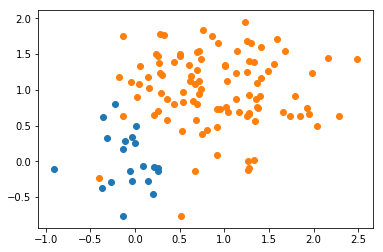

In [17]:
# 1. visualize the problem
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(*x.T, label='x')
ax.scatter(*y.T, label='y')

In [18]:
# 2. simplify the problem, i.e. less data, less dimensions (1d)
# let's take a look at some dummy data
xd = np.array([-2, 0, 2])
yd = np.array([1])

yd - xd

array([ 3,  1, -1])

In [19]:
xd = np.array([-2, 0, 2])
yd = np.array([1, 5])

yd - xd.reshape((-1, 1))  # by exploiting broadcasting, we can make it work

array([[ 3,  7],
       [ 1,  5],
       [-1,  3]])

In [20]:
# now the 2d case with dummy data
x = np.array([[1, 2], [3, 4]])  # 2 points
y = np.array([[1, 2]])  # 1 point
diffs = y - x
diffs

array([[ 0,  0],
       [-2, -2]])

In [21]:
# 2d, not what we would like to see
x = np.array([[1, 2], [3, 4]])  # 2 points
y = np.array([[1, 2], [5, 5]])  # 2 points
diffs = y - x
diffs

array([[0, 0],
       [2, 1]])

In [22]:
# 2d, expand dimensions to make broadcasting work for us
x = np.array([[1, 2], [3, 4]])  # 2 points
y = np.array([[1, 2], [5, 5]])  # 2 points
diffs = y - x[:, np.newaxis]
diffs

array([[[ 0,  0],
        [ 4,  3]],

       [[-2, -2],
        [ 2,  1]]])

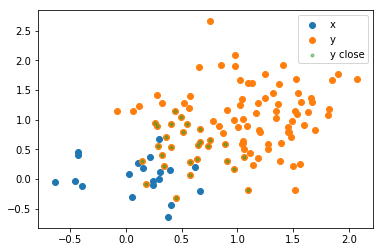

In [23]:
# distances
# for real applications, pdist/cdist are recommended
# if only neighbors relevant, KDTree may be more appropriate
# scipy.spatial.cKDTree or sklearn.neighbors.KDTree
x = multivariate_normal(mean=np.array([0, 0]),
                        cov=np.array([[0.1, 0], [0, 0.1]])).rvs(size=20)
y = multivariate_normal(mean=np.array([1, 1]),
                        cov=np.array([[0.3, 0], [0, 0.3]])).rvs(size=100)

diffs = y - x[:, np.newaxis]
dists = np.sqrt((diffs**2).sum(axis=-1))
idx = (dists < 0.5).any(axis=0)

fig, ax = plt.subplots()
ax.scatter(*x.T, label='x')
ax.scatter(*y.T, label='y')
ax.scatter(*y[idx].T, marker='.', alpha=0.5, label='y close')
ax.legend()